In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_rain = pd.read_excel('file://localhost/Users/mattcurrey/Downloads/climate_data.xls', sheetname='Precipitation', skiprows=6)
df_sun = pd.read_excel('file://localhost/Users/mattcurrey/Downloads/climate_data.xls', sheetname='Sunshine',skiprows=3)
df_temp = pd.read_excel('file://localhost/Users/mattcurrey/Downloads/climate_data.xls', sheetname='Temp', skiprows=3)
df_wind = pd.read_excel('file://localhost/Users/mattcurrey/Downloads/climate_data.xls', sheetname='Wind', skiprows=3)

# PRECIPITATION DATASET FOR CITIES IN THE UNITED STATES
ave_rain = []
for i in range(0,len(df_rain)):
    ave_rain.append(df_rain.iloc[i].values[1:].mean())

df_rain = df_rain.rename(columns={'284 CITIES': 'CITIES'})
df_rain['AVG'] = ave_rain
df_rain = df_rain[df_rain.CITIES.str.contains(", PC") == False]
df_rain_avg = df_rain[['CITIES','AVG']]
df_rain_avg = df_rain_avg.sort_values(by='AVG',ascending=False)
TN_rain = df_rain[df_rain.CITIES.str.contains(", TN") == True]
TN_rain_series = TN_rain.iloc[0][1:13]
TN_rain = TN_rain.sort_values(by='AVG',ascending=False)
TN_rain_cities = TN_rain['CITIES'].values
TN_rain_cities = [i.split(', TN')[0] for i in TN_rain_cities]
TN_rain_values = TN_rain['AVG'].values
TN_rain_values = TN_rain_values.round(decimals=2)

# SUNLIGHT DATASET FOR CITIES IN THE UNITED STATES
ave_sun = []
for i in range(0,len(df_sun)):
    ave_sun.append(df_sun.iloc[i].values[1:].mean())

df_sun = df_sun.rename(columns={'174 CITIES': 'CITIES'})
df_sun['AVG'] = ave_sun
df_sun = df_sun[df_sun.CITIES.str.contains(", PC") == False]
df_sun_avg = df_sun[['CITIES','AVG']]
df_sun_avg = df_sun_avg.sort_values(by='AVG',ascending=False)
TN_sun = df_sun[df_sun.CITIES.str.contains(", TN") == True]
TN_sun = TN_sun.sort_values(by='AVG',ascending=False)
TN_sun_cities = TN_sun['CITIES'].values
TN_sun_values = TN_sun['AVG'].values
#TN_sun_values = TN_sun_values.round(decimals=2)
# df_sun_avg['AVG'].mean()  # CALCULATES THE AVERAGE SUNLIGHT FOR ALL CITIES IN THE DATASET
# df_sun_avg[df_sun_avg['174 CITIES']=='KNOXVILLE, TN']   # CALCULTES THE AVERAGE SUNLIGHT FOR KNOXVILLE, TN

# TEMPERATURE DATASET FOR CITIES IN THE UNITED STATES
ave_temp = []
for i in range(0,len(df_temp)):
    ave_temp.append(df_temp.iloc[i].values[1:].mean())

df_temp = df_temp.rename(columns={'283 CITIES': 'CITIES'})
df_temp['AVG'] = ave_temp
df_temp = df_temp[df_temp.CITIES.str.contains(", PC") == False]
df_temp_avg = df_temp[['CITIES','AVG']]
df_temp_avg = df_temp_avg.sort_values(by='AVG',ascending=False)
TN_temp = df_temp[df_temp.CITIES.str.contains(", TN") == True]
TN_temp = TN_temp.sort_values(by='AVG',ascending=False)
TN_temp_cities = TN_temp['CITIES'].values
TN_temp_values = TN_temp['AVG'].values
#TN_temp_values = TN_temp_values.round(decimals=2)

# WIND DATASET FOR CITIES IN THE UNITED STATES
ave_wind = []
for i in range(0,len(df_wind)):
    ave_wind.append(df_wind.iloc[i].values[1:].mean())

df_wind = df_wind.rename(columns={'275 CITIES': 'CITIES'})
df_wind['AVG'] = ave_wind
df_wind = df_wind[df_wind.CITIES.str.contains(", PC") == False]
df_wind_avg = df_wind[['CITIES', 'AVG']]
df_wind_avg = df_wind_avg.sort_values(by='AVG',ascending=False)
TN_wind = df_wind[df_wind.CITIES.str.contains(", TN") == True]
TN_wind = TN_wind.sort_values(by='AVG',ascending=False)
TN_wind_cities = TN_wind['CITIES'].values
TN_wind_values = TN_wind['AVG'].values
#TN_wind_values = TN_wind_values.round(decimals=2)

pos = np.arange(len(TN_rain_cities))

def TN_bars():
    plt.figure()
    pos = np.arange(len(TN_rain_cities))
    ax1 = plt.subplot(1,2,1)
    rain_bars = plt.bar(pos, TN_rain_values, align='center', linewidth=0, color='lightslategrey')
    rain_bars[0].set_color('#1F77B4')
    plt.xticks(pos, TN_rain_cities, alpha=0.8, fontsize=5.4)
    plt.title('Average Monthly Precipitation (in.)', fontsize=10)
    plt.tick_params(top='off', left='off', bottom='off', right='off', labelleft='off', labelbottom='on')

    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    for bar in rain_bars:
        plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.4, str(float(bar.get_height())), ha='center', color='w', fontsize=10)
    
    plt.subplot(1,2,2)
    pos2 = np.arange(len(TN_sun_cities))
    sun_bars = plt.bar(pos, TN_sun_values, align='center', linewidth=0, color='#ffbd45')
    sun_bars[0].set_color('#ffa500')
    plt.xticks(pos2, TN_rain_cities, alpha=0.8, fontsize=5.4)
    plt.title('Average Monthly Sunshine (%)', fontsize=10)
    plt.tick_params(top='off', left='off', bottom='off', right='off', labelleft='off', labelbottom='on')

    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    for bar in sun_bars:
        plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())), ha='center', color='w', fontsize=10)
    
    plt.savefig('Assignment4')
    
    return plt.show()

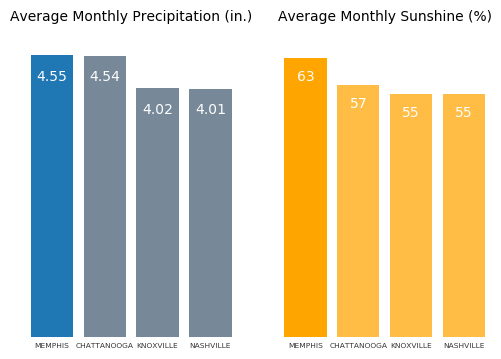

In [2]:
TN_bars()